# Rogowskis vs Bdots

This code analyses pairs of Bdots to find the magnetic field and the rogowskis to find the current. This allows the two to be plotted on the same graph

To get started, run the code in the cell below:

In [1]:
%matplotlib notebook
from SourceCode.Bdots import *
from SourceCode.Rogowskis import *

Next, add details from the lab book, such as the shot number, which pairs were attached to which channels, what the scope attenuations were, and specify the diameter of each Bdot pair. The diameter is in mm.

In [18]:
shot="s0202_15"
returnPosts = 4
pairs={"T10":"D"}
attenuations={"D1":2, "D2":2}
diameters={"T10":1} #diameter in mm

This next cell creates an object ('b') which knows about all of the bdots you've specified above. It automatically truncates the data, calibrates and integrates using default values. Often, you need to alter the 'threshold', which is the signal at which the integration begins. If you find your integration begins too late, consider a lower value. For very noisy data, this will fail.

In [19]:
b=Bdots(shot=shot, pairs=pairs, attenuations=attenuations, diameters=diameters, threshold=1)

This next cell creates an object ('r') which stores the rogowskis. It automatically truncates the data, calibrates and integrates using default values.

In [20]:
r=Rogowskis(shot, returnPosts)

s0202_15: using both Rogs
Current start: 1491.66 ns
Peak current: 0.7011320394 MA


Now you have 'b' and 'r', you can get it to plot data using the plot() command.

b.plot() wants two keywords - the name of the pair, and the data set you want. Name is something like "G12", and data set can be:
* "raw" - the raw signals from the scopes
* "tr" - the signals after truncation and calibration
* "E&B" - the sum and difference of the two signals, or electrostatic and dB/dt contributions
* "B" - the integrated B field.

r.plot() wants a keywords - the data set you want:
* "raw" - the raw signals from the scopes
* "tr" - the signals after truncation and calibration
* "I" - the current through each probe
* "total" - the total current of the shot

We can customise the plot easily using standard python commands.

<IPython.core.display.Javascript object>


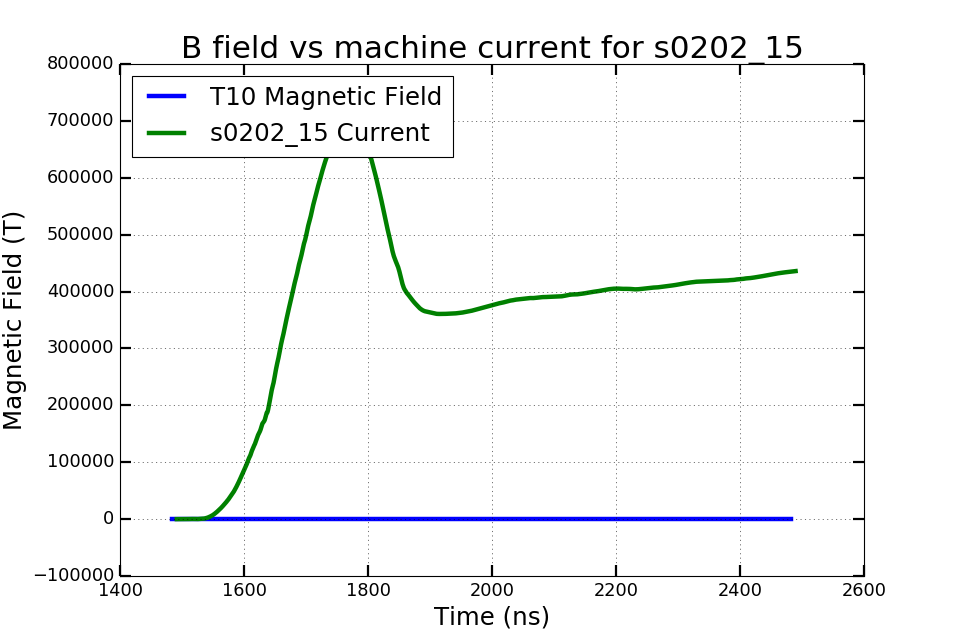

In [22]:
fig, ax=plt.subplots(figsize=(12,8)) #create a figure an attach a set of axes, ax, to it. All the plots will be on ax.
b.plot("T10", "B", ax=ax) #plot the Bdot pairs
r.plot("total", ax=ax) #plot the current from rogowskis

#ax.set_xlim([1450,2250]) #set the x scale
ax.set_title("B field vs machine current for "+b.shot, fontsize=28)
ax.set_xlabel("Time (ns)", fontsize=22)
ax.set_ylabel("Magnetic Field (T)", fontsize=22)
ax.tick_params(labelsize=16, pad=5, length=10, width=2) #this sets the ticks and also the fontsize of the tick labels
ax.grid() #sets the background grid for easy viewing
ax.legend(fontsize=22, loc=2) #produces a legend.